In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
from google.colab import drive
drive.mount('/content/drive',force_remount=True)
os.chdir('/content/drive/My Drive/Bertexperiment')
import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [ ]:
!pip install tensorflow-datasets
import tensorflow_datasets as tfds
!pip install datasets
import datasets
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip3 install torch==1.10.2+cu113 torchvision==0.11.3+cu113 torchaudio==0.10.2+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

!pip3 install sklearn
!pip3 install tqdm
!pip3 install transformers
#!pip3 install torch torchvision torchaudio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.3 MB/s eta 0:00:00
Looking in links: https://download.pytorch.org/whl/cu113/torch_stable.html
ERROR: Could not find a version that satisfies the requirement torch==1.10.2+cu113 (from versions: 1.11.0, 1.11.0+cu113, 1.12.0, 1.12.0+cu113, 1.12.1, 1.12.1+cu113, 1.13.0, 1.13.1, 2.0.0, 2.0.1, 2.1.0, 2.1.1)
ERROR: No matching distribution found for torch==1.10.2+cu113
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an 

In [ ]:
import tensorflow as tf

In [ ]:
batch_size = 8
seq_len = 512

In [ ]:
from transformers import TFAutoModel

bert = TFAutoModel.from_pretrained('bert-base-uncased')

bert.summary()

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Model: "tf_bert_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
Total params: 109482240 (417.64 MB)
Trainable params: 109482240 (417.64 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')

embeddings = bert.bert(input_ids, attention_mask=mask)[1]

x =tf.keras.layers.Dense(1024,activation ='relu')(embeddings)
dropout = tf.keras.layers.Dropout(0.5)(x)
y = tf.keras.layers.Dense(4, activation='softmax',name ='outputs')(dropout)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=y)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 512, 7                                       

In [ ]:
import tensorflow as tf
!pip install tensorflow-addons
import tensorflow_addons as tfa

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False, name='AdamW')

loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')
precision = tf.keras.metrics.Precision(name='precision')
recall = tf.keras.metrics.Recall(name='recall')
f1 = tfa.metrics.F1Score(num_classes=4, average='weighted', name='f1_score')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


In [ ]:
model.compile(optimizer=optimizer, loss= loss, metrics=[acc, f1, precision, recall])

In [ ]:
batch_size = 8
seq_len = 512

In [ ]:
model.save('/content/drive/My Drive/Bertexperiment/bert_base_uncased_expmodelpre')

In [ ]:
import tensorflow as tf
from tensorflow_addons.metrics import F1Score

# Assuming 'model' is your TensorFlow model
model.save('/content/drive/My Drive/Bertexperiment/bert_base_uncased_expmodelpre')


In [ ]:
model.save('/content/drive/My Drive/Bertexperiment/bert_base_uncased_expmodelpre.h5')

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('/content/drive/My Drive/Bertexperiment/bert_base_uncased_expmodelpre')

In [ ]:
import tensorflow as tf
from tensorflow_addons.metrics import F1Score

# Define F1Score metric
f1 = F1Score(num_classes=4, average='weighted', name='f1_score')

# Load the model and specify the custom metric
loaded_model = tf.keras.models.load_model(
    '/content/drive/My Drive/Bertexperiment/bert_base_uncased_expmodelpre',
    custom_objects={'F1Score': f1}
)



In [ ]:
from transformers import BertTokenizer
import tensorflow as tf

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def prep_data(text, seq_len=512):
    tokens = tokenizer.encode_plus(text, max_length=seq_len, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return {
        'input_ids': tf.cast(tokens['input_ids'], tf.float64),
        'attention_mask': tf.cast(tokens['attention_mask'], tf.float64)
    }


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Texting

In [ ]:
import pandas as pd
test_df = pd.read_csv('/content/drive/My Drive/Bertexperiment/test_imp.csv')


In [ ]:
test_df.head()

,text,label
0,turnover helps colts derail packers peyton man...,1
1,fans await spurrier gators fall successful sie...,1
2,cejka moves contention las vegas european tour...,1
3,coach still fighting mad estrada athens hours ...,1
4,indiana hires hoeppner miami ohios terry hoepp...,1


In [ ]:

num_instances = test_df.shape[0]

print("Number of Instances in Test Set:", num_instances)

Number of Instances in Test Set: 19323


In [ ]:
test_df['text'] = test_df['text'].astype(str)


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19323 entries, 0 to 19322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    19323 non-null  object
 1   label   19323 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 302.0+ KB


In [ ]:
l = list(test_df['text'])
t = list(test_df['label'])

In [ ]:
l=l[0:]
t=t[0:]

In [ ]:
res=[]
prob_lst=[]
for i in range(len(l)):
  test = prep_data(l[i])
  probs = model.predict(test)
  prob_lst.append(probs)
  test= int(np.argmax(probs))
  res.append(test)
  print(f"{i}/{len(l)}")
print(res)




Streaming output truncated to the last 5000 lines.
16823/19323
1/1 [==============================] - 0s 50ms/step
16824/19323
1/1 [==============================] - 0s 51ms/step
16825/19323
1/1 [==============================] - 0s 52ms/step
16826/19323
1/1 [==============================] - 0s 54ms/step
16827/19323
1/1 [==============================] - 0s 49ms/step
16828/19323
1/1 [==============================] - 0s 51ms/step
16829/19323
1/1 [==============================] - 0s 50ms/step
16830/19323
1/1 [==============================] - 0s 55ms/step
16831/19323
1/1 [==============================] - 0s 55ms/step
16832/19323
1/1 [==============================] - 0s 58ms/step
16833/19323
1/1 [==============================] - 0s 57ms/step
16834/19323
1/1 [==============================] - 0s 57ms/step
16835/19323
1/1 [==============================] - 0s 58ms/step
16836/19323
1/1 [==============================] - 0s 58ms/step
16837/19323
1/1 [==============================] - 0s

In [ ]:
data = {'text': l, 'label': t, 'predictions': res}
df = pd.DataFrame(data)

In [ ]:
pdata = {'probabilities': prob_lst}
ppdf = pd.DataFrame(pdata)

In [ ]:
df

,text,label,predictions
0,turnover helps colts derail packers peyton man...,1,1
1,fans await spurrier gators fall successful sie...,1,1
2,cejka moves contention las vegas european tour...,1,1
3,coach still fighting mad estrada athens hours ...,1,1
4,indiana hires hoeppner miami ohios terry hoepp...,1,1
...,...,...,...
19318,american express weighs lawsuit vs visa master...,2,0
19319,thousands rush home egypt bombings thousands f...,0,1
19320,kyoto wont hit russian economy russian economi...,2,1
19321,cubs sign shortstop chicago chicago cubs come ...,1,1


In [ ]:
df.to_csv('/content/drive/My Drive/Bertexperiment/predictions_pre.csv', index=False)
print(df)

                                                    text  label  predictions
0      turnover helps colts derail packers peyton man...      1            1
1      fans await spurrier gators fall successful sie...      1            1
2      cejka moves contention las vegas european tour...      1            1
3      coach still fighting mad estrada athens hours ...      1            1
4      indiana hires hoeppner miami ohios terry hoepp...      1            1
...                                                  ...    ...          ...
19318  american express weighs lawsuit vs visa master...      2            0
19319  thousands rush home egypt bombings thousands f...      0            1
19320  kyoto wont hit russian economy russian economi...      2            1
19321  cubs sign shortstop chicago chicago cubs come ...      1            1
19322  mixed signals sustain rally stocks edged week ...      2            1

[19323 rows x 3 columns]


In [ ]:
ppdf.to_csv('/content/drive/My Drive/Bertexperiment/probs_pre.csv', index=False)
print(ppdf)

                                           probabilities
0      [[0.2808421, 0.39329824, 0.21413048, 0.11172924]]
1      [[0.26263395, 0.3261206, 0.25141028, 0.15983522]]
2      [[0.27908403, 0.30725944, 0.22695611, 0.186700...
3      [[0.27645132, 0.3632768, 0.19664767, 0.16362424]]
4      [[0.28130278, 0.39454383, 0.22059144, 0.103561...
...                                                  ...
19318  [[0.2787049, 0.24343805, 0.22222808, 0.25562897]]
19319  [[0.26271763, 0.35424307, 0.22678082, 0.156258...
19320   [[0.286805, 0.35266256, 0.23280993, 0.12772247]]
19321  [[0.27790055, 0.4233994, 0.19561662, 0.10308343]]
19322  [[0.28292304, 0.28725427, 0.22781804, 0.202004...

[19323 rows x 1 columns]


In [ ]:
len(res)

19323

In [ ]:
len(l)

19323

In [ ]:
l[3402]

'dravid wins first cricketer year award flintoff honored india batsman rahul dravid voted player year international cricket council inaugural awards ceremony london averaging runs innings national team'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example true labels and predicted labels for multiple classes
true_labels = t
predicted_labels = res
# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate precision for each class
precision_per_class = precision_score(true_labels, predicted_labels, average=None)

# Calculate recall for each class
recall_per_class = recall_score(true_labels, predicted_labels, average=None)

# Calculate F1-score for each class
f1_per_class = f1_score(true_labels, predicted_labels, average=None)

# Display the results
print(f"Accuracy: {accuracy:.2f}")
print("Precision per class:", precision_per_class)
print("Recall per class:", recall_per_class)
print("F1-score per class:", f1_per_class)

Accuracy: 0.25
Precision per class: [0.17483757 0.27716436 0.0952381  0.        ]
Recall per class: [1.84079602e-01 7.96000808e-01 4.20079815e-04 0.00000000e+00]
F1-score per class: [0.17933959 0.41116328 0.00083647 0.        ]


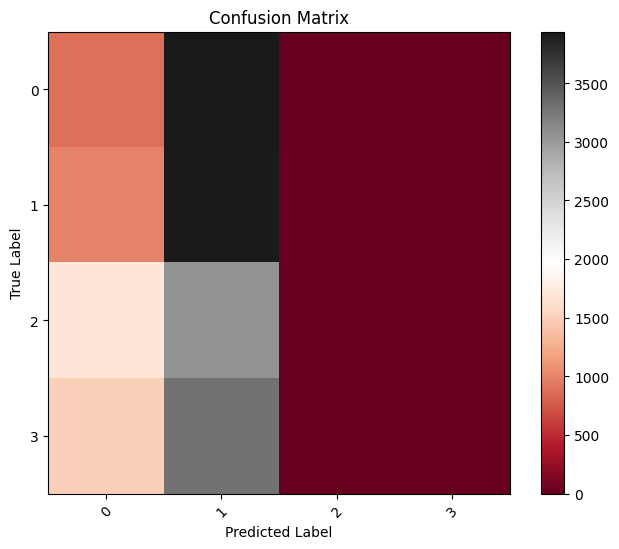

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report, precision_recall_curve
import numpy as np

# Assuming y_true and y_pred are your true and predicted labels
y_true = t  # replace with your true labels
y_pred = res  # replace with your predicted labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdGy)
plt.colorbar()
tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, set(y_true), rotation=45)
plt.yticks(tick_marks, set(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


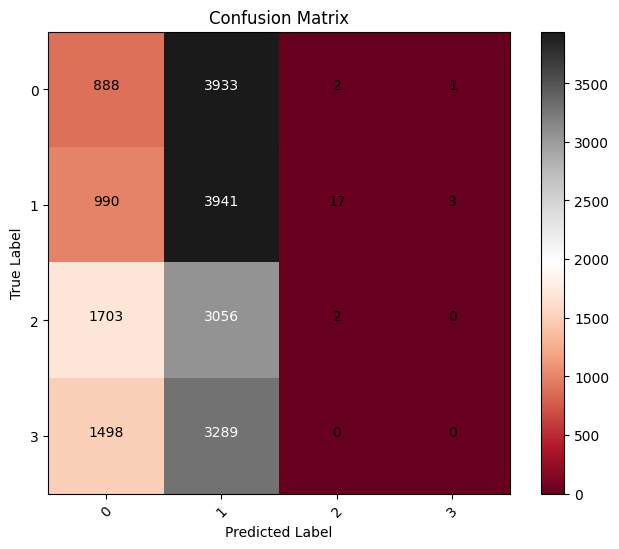

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Assuming y_true and y_pred are your true and predicted labels
y_true = t  # replace with your true labels
y_pred = res  # replace with your predicted labels

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
plt.title("Confusion Matrix")
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.RdGy)
plt.colorbar()

# Adding the numbers
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2 else "black")

tick_marks = np.arange(len(set(y_true)))
plt.xticks(tick_marks, set(y_true), rotation=45)
plt.yticks(tick_marks, set(y_true))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



In [ ]:
prob_lst[0:5]

[array([[0.2808421 , 0.39329824, 0.21413048, 0.11172924]], dtype=float32),
 array([[0.26263395, 0.3261206 , 0.25141028, 0.15983522]], dtype=float32),
 array([[0.27908403, 0.30725944, 0.22695611, 0.18670045]], dtype=float32),
 array([[0.27645132, 0.3632768 , 0.19664767, 0.16362424]], dtype=float32),
 array([[0.28130278, 0.39454383, 0.22059144, 0.10356195]], dtype=float32)]

In [ ]:
y_pred_prob = np.vstack(prob_lst)

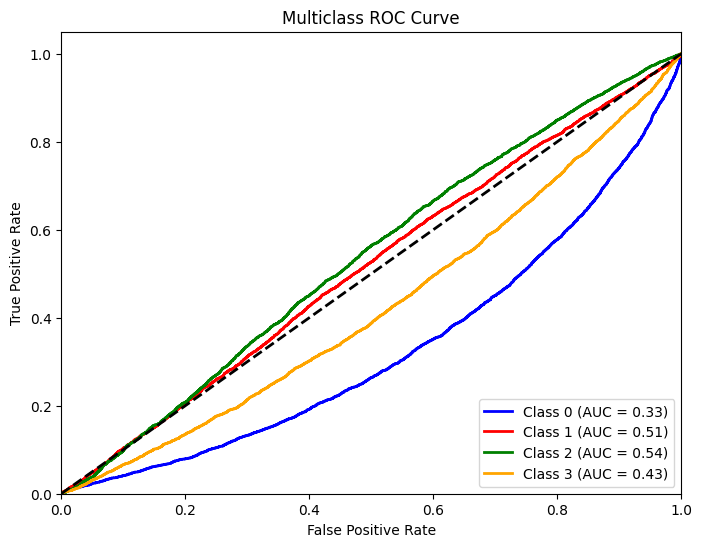

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from itertools import cycle

# Assuming y_true contains the true labels for your samples
y_true = t  # replace with your true labels

# Binarize the output
n_classes = y_pred_prob.shape[1]
y_true_binarized = label_binarize(y_true, classes=np.arange(n_classes))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(8, 6))
colors = cycle(['blue', 'red', 'green', 'orange'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()
